In [1]:
# Import libraries
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 400)
import requests
import matplotlib.pyplot as plt
import json
import re
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import seaborn as sns

In [2]:
# Read csv from raw github link and create dataframe
url = 'https://raw.githubusercontent.com/dianeooty/datascience_salary/main/Resources/layoffs_cleaned.csv'
layoffs_df = pd.read_csv(url)

In [3]:
# Read csv from raw github link and create dataframe
url = 'https://raw.githubusercontent.com/dianeooty/datascience_salary/main/Resources/salaries_cleaned.csv'
salaries_df = pd.read_csv(url)

In [4]:
# View dataframe info
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               62642 non-null  int64  
 1   timestamp                62642 non-null  object 
 2   date                     62642 non-null  object 
 3   company                  62637 non-null  object 
 4   level                    62523 non-null  object 
 5   title                    62642 non-null  object 
 6   totalyearlycompensation  62642 non-null  int64  
 7   location                 62642 non-null  object 
 8   latitude                 62642 non-null  float64
 9   longitude                62642 non-null  float64
 10  yearsofexperience        62642 non-null  float64
 11  yearsatcompany           62642 non-null  float64
 12  basesalary               62642 non-null  int64  
 13  stockgrantvalue          62642 non-null  int64  
 14  bonus                 

In [5]:
# Check dataframe's info
layoffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2545 entries, 0 to 2544
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2545 non-null   int64  
 1   company              2545 non-null   object 
 2   location             2545 non-null   object 
 3   industry             2543 non-null   object 
 4   total_laid_off       2545 non-null   int64  
 5   percentage_laid_off  1694 non-null   float64
 6   date                 2543 non-null   object 
 7   stage                2539 non-null   object 
 8   country              2545 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 179.1+ KB


In [6]:
# Drop unamed column
salaries_df = salaries_df.drop(columns='Unnamed: 0')
salaries_df.head()

,timestamp,date,company,level,title,totalyearlycompensation,location,latitude,longitude,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Race,Education
0,2017-06-07 11:33:00,2017-06-07 00:00:00,Oracle,L3,Product Manager,127000,"Redwood City, CA",37.486324,-122.232523,1.5,1.5,107000,20000,10000,Unknown,Unknown,Unknown
1,2017-06-10 17:11:00,2017-06-10 00:00:00,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",37.779026,-122.419906,5.0,3.0,0,0,0,Unknown,Unknown,Unknown
2,2017-06-11 14:53:00,2017-06-11 00:00:00,Amazon,L7,Product Manager,310000,"Seattle, WA",47.603832,-122.330062,8.0,0.0,155000,0,0,Unknown,Unknown,Unknown
3,2017-06-17 00:23:00,2017-06-17 00:00:00,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",37.368830,-122.036349,7.0,5.0,157000,180000,35000,Unknown,Unknown,Unknown
4,2017-06-20 10:58:00,2017-06-20 00:00:00,Microsoft,60,Software Engineer,157000,"Mountain View, CA",37.389389,-122.083210,5.0,3.0,0,0,0,Unknown,Unknown,Unknown


In [7]:
# Drop unamed column
layoffs_df = layoffs_df.drop(columns='Unnamed: 0')
layoffs_df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country
0,N26,Berlin,Finance,71,4.0,2023-04-28,Series E,United States
1,Providoor,Melbourne,Food,0,100.0,2023-04-28,Unknown,Australia
2,Dropbox,SF Bay Area,Other,500,16.0,2023-04-27,Post-IPO,United States
3,Vroom,New York City,Transportation,120,11.0,2023-04-27,Post-IPO,United States
4,Greenhouse,New York City,Recruiting,100,12.0,2023-04-27,Private Equity,United States


# Correlation

In [8]:
# find all corr for num
salaries_corr = salaries_df.corr()
salaries_corr 

,totalyearlycompensation,latitude,longitude,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
totalyearlycompensation,1.000000,0.142647,-0.355284,0.422879,0.165802,0.672865,0.770756,0.489454
latitude,0.142647,1.000000,-0.507834,0.009778,0.022753,0.168056,0.079644,0.061682
longitude,-0.355284,-0.507834,1.000000,-0.024003,-0.030682,-0.422624,-0.203133,-0.129335
yearsofexperience,0.422879,0.009778,-0.024003,1.000000,0.522611,0.374437,0.289631,0.261051
yearsatcompany,0.165802,0.022753,-0.030682,0.522611,1.000000,0.145596,0.089492,0.108122
basesalary,0.672865,0.168056,-0.422624,0.374437,0.145596,1.000000,0.468266,0.394352
stockgrantvalue,0.770756,0.079644,-0.203133,0.289631,0.089492,0.468266,1.000000,0.248151
bonus,0.489454,0.061682,-0.129335,0.261051,0.108122,0.394352,0.248151,1.000000


In [9]:
#drop the unrelated columns
salaries_corr = salaries_corr.drop(columns=['latitude', "longitude", "basesalary", 'stockgrantvalue', 'bonus'])

In [10]:
#drop the unrelated index
salaries_corr = salaries_corr.drop(index=['latitude', "longitude", "basesalary", 'stockgrantvalue', 'bonus'])

<AxesSubplot:>

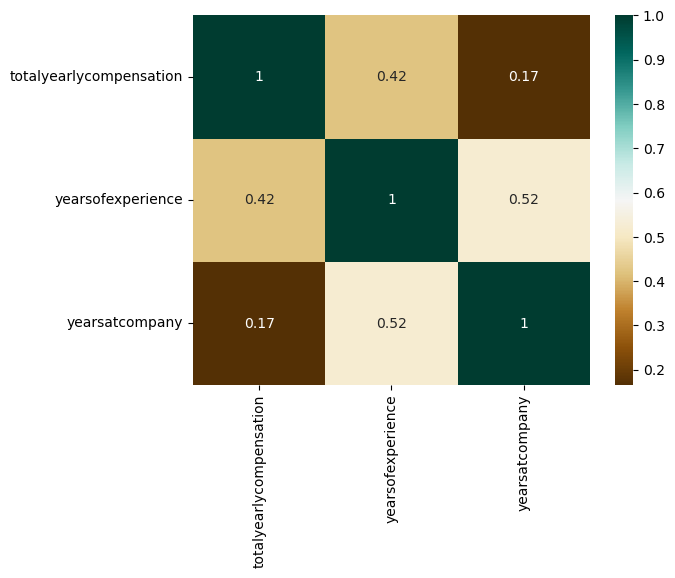

In [11]:
#heatmap for correlation
sns.heatmap(salaries_corr, cmap = "BrBG",annot=True)

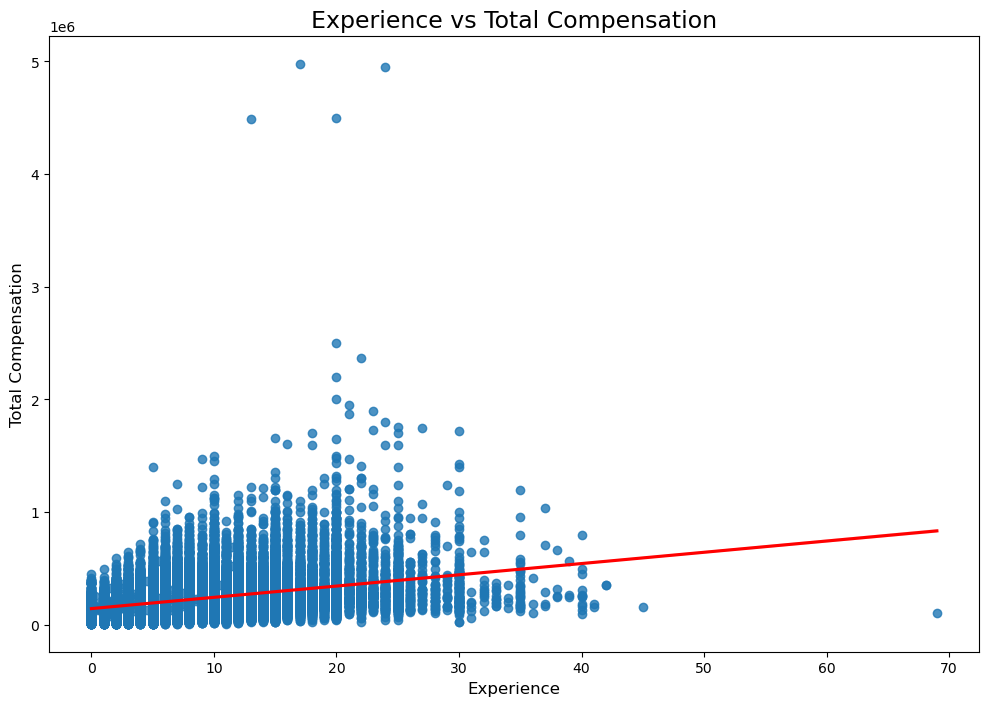

In [12]:
# plot the year compensation vs experiences
plt.figure(figsize=(12,8))
sns.regplot(x=salaries_df["yearsofexperience"], y=salaries_df["totalyearlycompensation"], line_kws = {"color": "red"})
plt.title("Experience vs Total Compensation", size=17)
plt.xlabel("Experience", size=12)
plt.ylabel("Total Compensation", size=12)
#plt.text(60, 5000000, "annotation")
plt.show()

Function for statistically analysis 

In [13]:
# create a function for p-value statistically significant analysis with 0.5 
def pvalue_stat(pval, a=.05):
    if pval<a :
        return f"{pval} ({pval:0.6f}) is Statistically Significant (reject the null hypothesis)"
    return f"{pval} ({pval:0.6f}) is Statistically Non-Significant (failed to reject the null hypothesis)"

# Gender

In [14]:
# Gender value count
gender = salaries_df["gender"].value_counts()
gender

Male       35702
Unknown    19541
Female      6999
Other        400
Name: gender, dtype: int64

In [15]:
# Creating Group for Anova
female = salaries_df[salaries_df["gender"]== "Female"]["totalyearlycompensation"]
male = salaries_df[salaries_df["gender"]== "Male"]["totalyearlycompensation"]

In [16]:
# perform anova test
ret = stats.f_oneway(female, male)
ret

F_onewayResult(statistic=97.03653044197561, pvalue=7.199280899773692e-23)

In [17]:
list(ret)

[97.03653044197561, 7.199280899773692e-23]

In [18]:
#result
pvalue_stat(ret[1])

'7.199280899773692e-23 (0.000000) is Statistically Significant (reject the null hypothesis)'

In [19]:
# remove unknow & other for plot
gender_plot = salaries_df.loc[(salaries_df["gender"] != "Unknown") & (salaries_df["gender"] != "Other")]

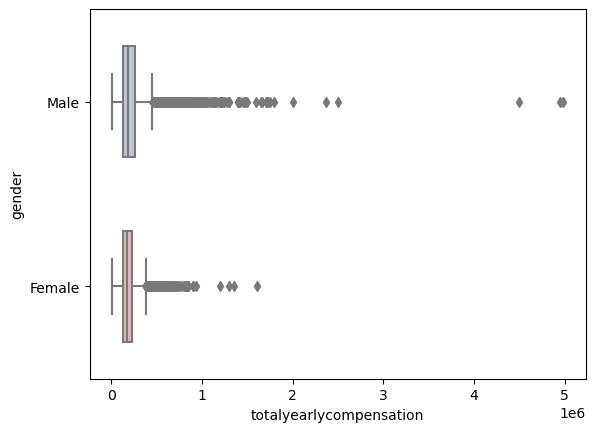

In [20]:
#plot the boxplot for gender
plot = sns.boxplot(x="totalyearlycompensation", y="gender", data=gender_plot,
             width=.6, palette="vlag")

In [21]:
# female quantiles, quartiles, and outliers
quartiles = female.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of female is: {lowerq}")
print(f"The upper quartile of female is: {upperq}")
print(f"The interquartile range of female is: {iqr}")
print(f"The the median of female is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of female is: 132000.0
The upper quartile of female is: 232000.0
The interquartile range of female is: 100000.0
The the median of female is: 175000.0 
Values below -18000.0 could be outliers.
Values above 382000.0 could be outliers.


In [22]:
# male quantiles, quartiles, and outliers
quartiles = male.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of male is: {lowerq}")
print(f"The upper quartile of male is: {upperq}")
print(f"The interquartile range of male is: {iqr}")
print(f"The the median of male is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of male is: 130000.0
The upper quartile of male is: 260000.0
The interquartile range of male is: 130000.0
The the median of male is: 185000.0 
Values below -65000.0 could be outliers.
Values above 455000.0 could be outliers.


# Race

In [23]:
race = salaries_df["Race"].value_counts()
race

Unknown        40215
Asian          11772
White           8032
Hispanic        1129
Two Or More      804
Black            690
Name: Race, dtype: int64

In [24]:
# Creating Group for Anova
asian = salaries_df[salaries_df["Race"]== "Asian"]["totalyearlycompensation"]
black = salaries_df[salaries_df["Race"]== "Black"]["totalyearlycompensation"]
hispanic = salaries_df[salaries_df["Race"]== "Hispanic"]["totalyearlycompensation"]
two_or_more = salaries_df[salaries_df["Race"]== "Two Or More"]["totalyearlycompensation"]
white = salaries_df[salaries_df["Race"]== "White"]["totalyearlycompensation"]

In [25]:
# perform anova test
ret = stats.f_oneway(asian, black, hispanic, two_or_more, white)
ret

F_onewayResult(statistic=15.76566761913388, pvalue=6.862083786426721e-13)

In [26]:
list(ret)

[15.76566761913388, 6.862083786426721e-13]

In [27]:
# result
pvalue_stat(ret[1])

'6.862083786426721e-13 (0.000000) is Statistically Significant (reject the null hypothesis)'

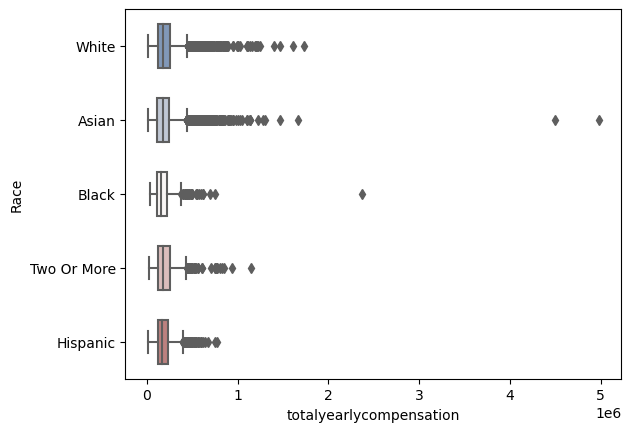

In [28]:
# remove unknow from plot
salaries_race = salaries_df.loc[salaries_df["Race"]!= "Unknown"]
#plot the boxplot for race
plot = sns.boxplot(x="totalyearlycompensation", y="Race", data=salaries_race,
         width=.6, palette="vlag")

In [29]:
# white quantiles, quartiles, and outliers
quartiles = white.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of white is: {lowerq}")
print(f"The upper quartile of white is: {upperq}")
print(f"The interquartile range of white is: {iqr}")
print(f"The the median of white is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of white is: 120000.0
The upper quartile of white is: 250000.0
The interquartile range of white is: 130000.0
The the median of white is: 175000.0 
Values below -75000.0 could be outliers.
Values above 445000.0 could be outliers.


In [30]:
# asian quantiles, quartiles, and outliers
quartiles = asian.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of asian is: {lowerq}")
print(f"The upper quartile of asian is: {upperq}")
print(f"The interquartile range of asian is: {iqr}")
print(f"The the median of asian is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of asian is: 115000.0
The upper quartile of asian is: 243000.0
The interquartile range of asian is: 128000.0
The the median of asian is: 174000.0 
Values below -77000.0 could be outliers.
Values above 435000.0 could be outliers.


In [31]:
# Hispanic quantiles, quartiles, and outliers
quartiles = hispanic.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Hispanic is: {lowerq}")
print(f"The upper quartile of Hispanic is: {upperq}")
print(f"The interquartile range of Hispanic is: {iqr}")
print(f"The the median of Hispanic is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Hispanic is: 120000.0
The upper quartile of Hispanic is: 230000.0
The interquartile range of Hispanic is: 110000.0
The the median of Hispanic is: 166000.0 
Values below -45000.0 could be outliers.
Values above 395000.0 could be outliers.


In [32]:
# Two or More quantiles, quartiles, and outliers
quartiles = two_or_more.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Two or More is: {lowerq}")
print(f"The upper quartile of Two or More is: {upperq}")
print(f"The interquartile range of Two or More is: {iqr}")
print(f"The the median of Two or More is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Two or More is: 123750.0
The upper quartile of Two or More is: 248000.0
The interquartile range of Two or More is: 124250.0
The the median of Two or More is: 173500.0 
Values below -62625.0 could be outliers.
Values above 434375.0 could be outliers.


In [33]:
# Black quantiles, quartiles, and outliers
quartiles = black.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Black is: {lowerq}")
print(f"The upper quartile of Black is: {upperq}")
print(f"The interquartile range of Black is: {iqr}")
print(f"The the median of Black is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Black is: 110000.0
The upper quartile of Black is: 215000.0
The interquartile range of Black is: 105000.0
The the median of Black is: 158000.0 
Values below -47500.0 could be outliers.
Values above 372500.0 could be outliers.


# Education

In [34]:
education = salaries_df["Education"].value_counts()
education

Unknown              32272
Master's Degree      15391
Bachelor's Degree    12601
PhD                   1703
Some College           355
Highschool             320
Name: Education, dtype: int64

In [35]:
# Creating Group for Anova
master = salaries_df[salaries_df["Education"]== "Master's Degree"]["totalyearlycompensation"]
bachelor = salaries_df[salaries_df["Education"]== "Bachelor's Degree"]["totalyearlycompensation"]
phd = salaries_df[salaries_df["Education"]== "PhD"]["totalyearlycompensation"]
some_college = salaries_df[salaries_df["Education"]== "Some College"]["totalyearlycompensation"]
highschool = salaries_df[salaries_df["Education"]== "Highschool"]["totalyearlycompensation"]

In [36]:
# perform anova test
ret = stats.f_oneway(master, bachelor, phd, some_college, highschool)
ret

F_onewayResult(statistic=380.1272370203267, pvalue=4.86e-320)

In [37]:
list(ret)

[380.1272370203267, 4.86e-320]

In [38]:
# result
pvalue_stat(ret[1])

'4.86e-320 (0.000000) is Statistically Significant (reject the null hypothesis)'

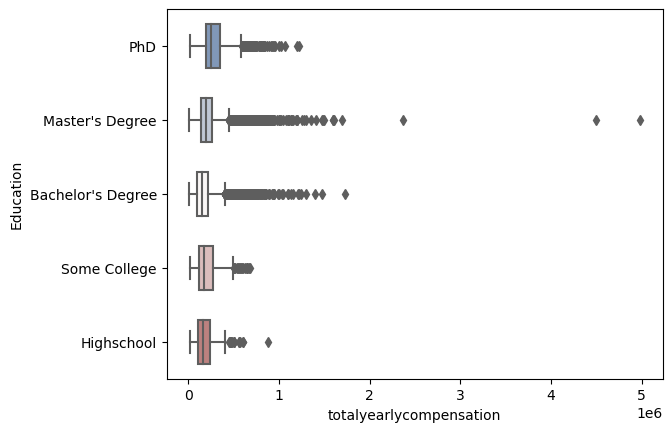

In [39]:
# remove unknow from plot
salaries_edu = salaries_df.loc[salaries_df["Education"]!= "Unknown"]
#plot the boxplot for education
plot = sns.boxplot(x="totalyearlycompensation", y="Education", data=salaries_edu,
             width=.6, palette="vlag")

In [40]:
# PhD quantiles, quartiles, and outliers
quartiles = phd.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of PhD is: {lowerq}")
print(f"The upper quartile of PhD is: {upperq}")
print(f"The interquartile range of PhD is: {iqr}")
print(f"The the median of PhD is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of PhD is: 193000.0
The upper quartile of PhD is: 350000.0
The interquartile range of PhD is: 157000.0
The the median of PhD is: 253000.0 
Values below -42500.0 could be outliers.
Values above 585500.0 could be outliers.


In [41]:
# Master's Degree quantiles, quartiles, and outliers
quartiles = master.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Master's Degree is: {lowerq}")
print(f"The upper quartile of Master's Degree is: {upperq}")
print(f"The interquartile range of Master's Degree is: {iqr}")
print(f"The the median of Master's Degree is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Master's Degree is: 143000.0
The upper quartile of Master's Degree is: 267000.0
The interquartile range of Master's Degree is: 124000.0
The the median of Master's Degree is: 195000.0 
Values below -43000.0 could be outliers.
Values above 453000.0 could be outliers.


In [42]:
# Bachelor's Degree quantiles, quartiles, and outliers
quartiles = bachelor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Bachelor's Degree is: {lowerq}")
print(f"The upper quartile of Bachelor's Degree is: {upperq}")
print(f"The interquartile range of Bachelor's Degree is: {iqr}")
print(f"The the median of Bachelor's Degree is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Bachelor's Degree is: 100000.0
The upper quartile of Bachelor's Degree is: 223000.0
The interquartile range of Bachelor's Degree is: 123000.0
The the median of Bachelor's Degree is: 156000.0 
Values below -84500.0 could be outliers.
Values above 407500.0 could be outliers.


In [43]:
# Some College quantiles, quartiles, and outliers
quartiles = some_college.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Some College is: {lowerq}")
print(f"The upper quartile of Some College is: {upperq}")
print(f"The interquartile range of Some College is: {iqr}")
print(f"The the median of Some College is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Some College is: 120000.0
The upper quartile of Some College is: 271000.0
The interquartile range of Some College is: 151000.0
The the median of Some College is: 173000.0 
Values below -106500.0 could be outliers.
Values above 497500.0 could be outliers.


In [44]:
# Highschool quantiles, quartiles, and outliers
quartiles = highschool.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Highschool is: {lowerq}")
print(f"The upper quartile of Highschool is: {upperq}")
print(f"The interquartile range of Highschool is: {iqr}")
print(f"The the median of Highschool is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Highschool is: 105750.0
The upper quartile of Highschool is: 243250.0
The interquartile range of Highschool is: 137500.0
The the median of Highschool is: 162500.0 
Values below -100500.0 could be outliers.
Values above 449500.0 could be outliers.
